In [22]:
import torch
from model import vae_loss, VariationalAutoencoderConv, VariationalAutoencoder, EncoderConv, DecoderConv
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from evaluate import *
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
batch_size = 128
beta = 1e-5
latent_dims = 2
TRANSFORMS = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
])
test_dataset = MNIST(root='./data/MNIST', download=True, train=False, transform=TRANSFORMS, target_transform=None)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [19]:
PATHconv2 = 'models/latent2_ep100_lr0.001_capacity64_batch128_beta1e-05_1614553086_894832.pt'
PATHconv10 = 'models/convTrue_latent10_ep100_lr0.001_capacity64_batch128.pt'
PATHlin2 = 'models/convFalse_latent2_ep100_lr0.001_capacity64_batch128.pt'
PATHlin10 = 'models/convFalse_latent10_ep100_lr0.001_capacity64_batch128.pt'
conv2 = torch.load(PATHconv2, map_location='cpu')
conv10 = torch.load(PATHconv10, map_location='cpu')
lin2 = torch.load(PATHlin2, map_location='cpu')
lin10 = torch.load(PATHlin10, map_location='cpu')

conv2.eval()
conv10.eval()
lin2.eval()
lin10.eval()

/Users/victorduthoit/anaconda3/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'model.Encoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/victorduthoit/anaconda3/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/victorduthoit/anaconda3/lib/python3.6/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the

In [25]:
c2 = VariationalAutoencoderConv(64, 2)
c2.encoder.load_state_dict(conv2.encoder.state_dict())

<All keys matched successfully>

In [32]:
models = [c2, conv10]

In [34]:
print(reconstruction_error(test_dataloader, c2, beta))
print(reconstruction_error(test_dataloader, conv10, beta))

average reconstruction error: 0.671981
0.6719806782806976
average reconstruction error: 0.122907
0.12290694894669932


Original images


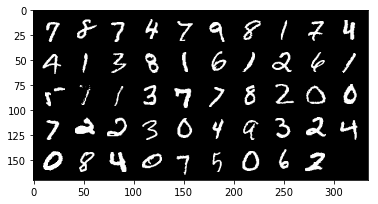

VAE reconstruction:


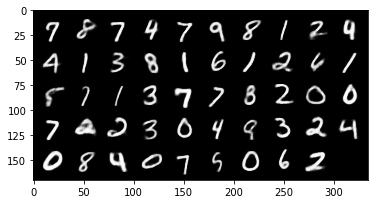

In [35]:
reconstruction(test_dataloader, conv10)

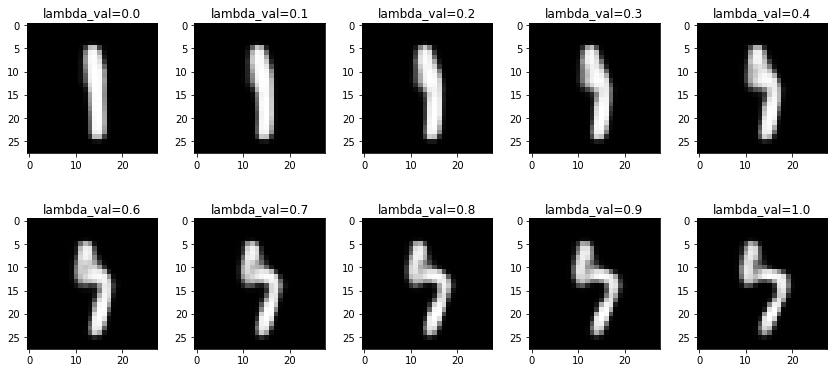

In [36]:
interpolation_plot(conv10, sort_digit(test_dataloader))

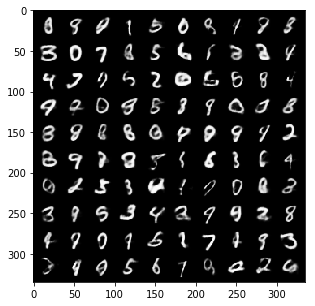

In [41]:
generate(conv10, 10)

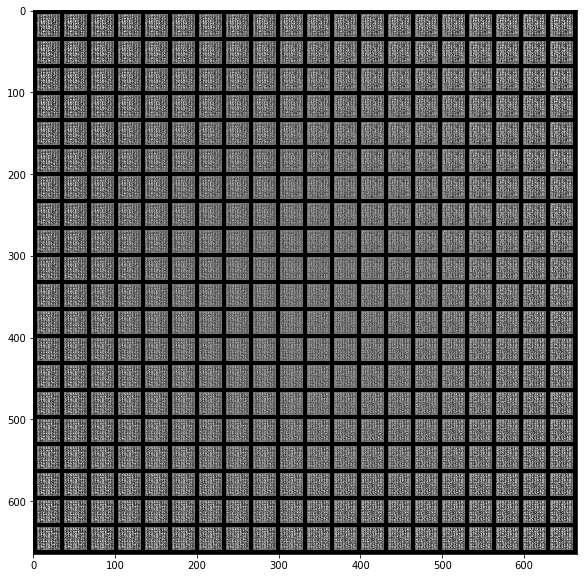

In [39]:
generation_map(c2)